## Lab: Tracking Titanic Survivor ML Model with MLflow

#### Duration: 20 mins

## Lab Summary
In this lab, you will work with a Titanic Survivor Machine Learning model and use MLflow to track experiments. You will log metrics, parameters, and the model to an MLflow tracking server, compare different runs, and register the best-performing model. Finally, you will validate the registered model with a new dataset.

---

## Key Objectives:
- Understand how to start and configure an MLflow tracking server.
- Learn to log experiment details such as parameters, metrics, and models using MLflow.
- Compare multiple experiments to identify the best-performing model.
- Register and validate the model using new data.

---


In [ ]:
!pip install seaborn
!pip install scikit-learn

#### <span style="color:orange">Step 1: Train Your Model</span>

Run below code to train the Titanic Survivor model

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset using Seaborn
titanic = sns.load_dataset('titanic')

# Drop rows with missing target and features
titanic = titanic.dropna(subset=['age', 'embarked', 'sex', 'class', 'fare', 'who', 'alone', 'survived'])

# Define features (X) and target (y)
X = titanic[['age', 'fare', 'class', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']

# Convert categorical features to numeric using Label Encoding
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model parameters
params = {
    "n_estimators": 100,
    "max_depth": None,
    "min_samples_split": 2,
    "random_state": 42
}

# Train a Random Forest Classifier
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Titanic Prediction Model is trained")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
# Visualize and save the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()

#### <span style="color:orange">Step 3: Install Mlflow and Start MLflow Server</span>

Open Your terminal and Run the following command to start the MLflow server locally:



In [ ]:
# Run below command in a terminal to start mlflow

pip install mlflow
mlflow server --host 127.0.0.1 --port 5001 
  

#### <span style="color:orange">Step 4: Track Metrics and Model</span>

Integrate the Titanic Survivor model code with MLflow by completing the TODO tasks provided in the code snippet below. Your task is to log parameters, metrics, and the trained model.


In [ ]:
import mlflow
### MLFLOW tracking
mlflow.set_tracking_uri(uri="http://127.0.0.1:5001")
mlflow.set_experiment("Titanic Survivor Model Experiment")

# Start an MLflow run
with mlflow.start_run():
        mlflow.log_params(params)
        mlflow.log_metric("acuracy", accuracy)
        mlflow.sklearn.log_model(model, "random_forest_regressor_model")


#### <span style="color:orange">Step 5: Access MLFlow Server on Browser</span>

Open browser and check your tracked experiment on MLFlow UI

http://127.0.0.1:5001


Go to MLFLow UI and click on the experiment

Check the Model Metrics and Evaluation

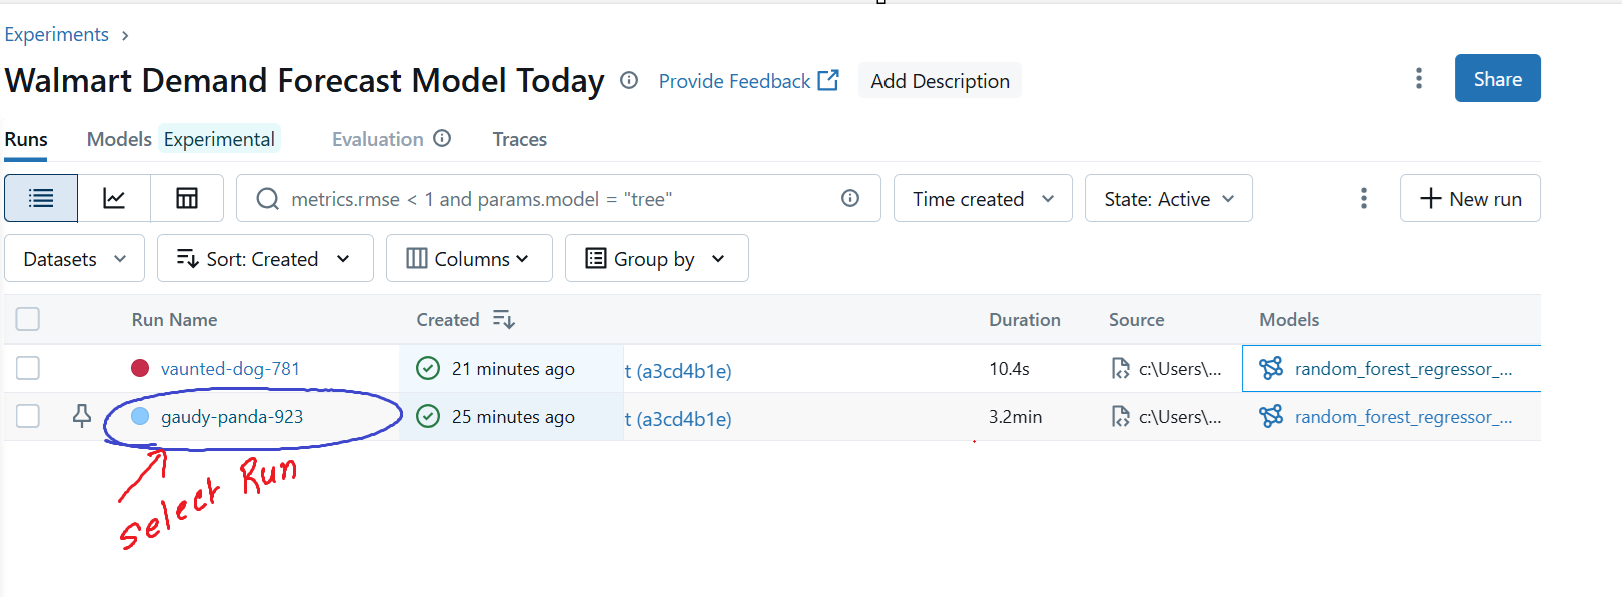

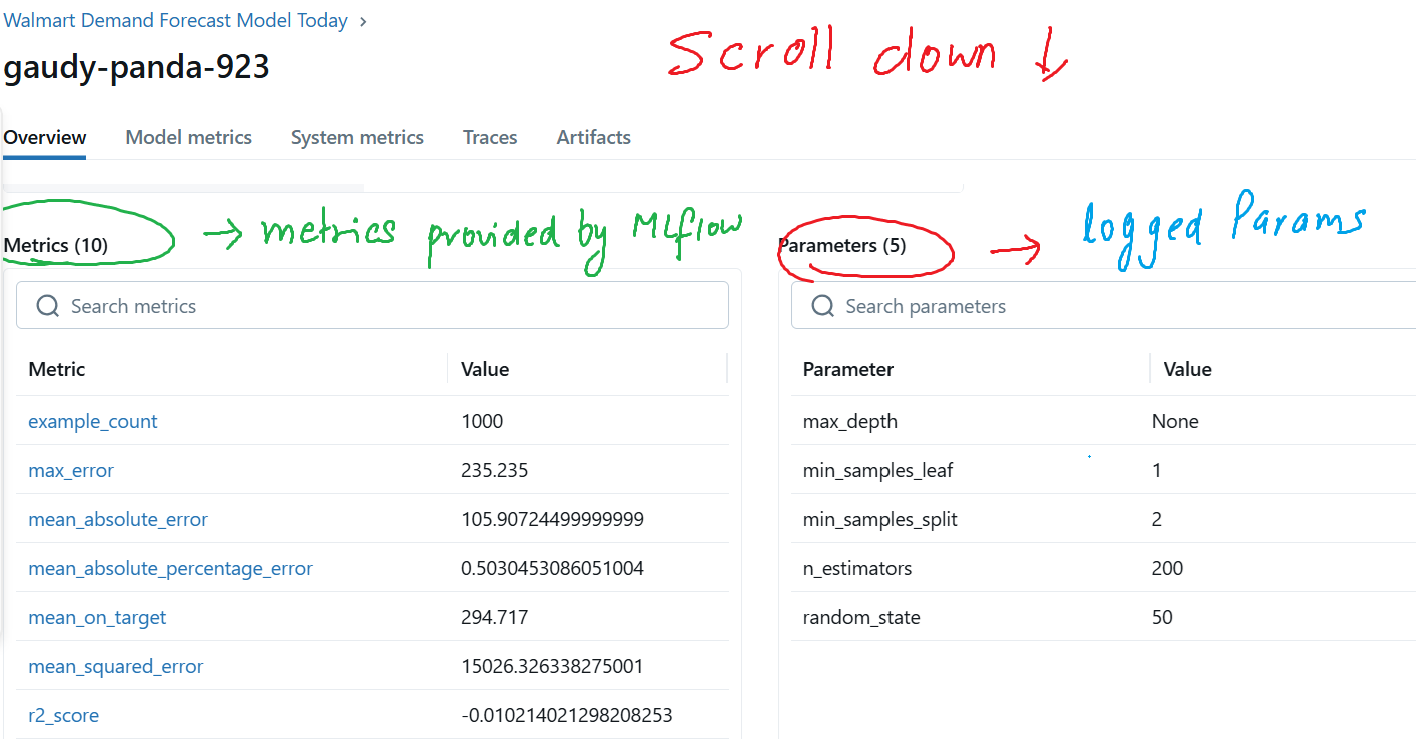

#### <span style="color:orange">Step 6: Retrain the model with different params</span>

Run below code to retrain model with different params

In [ ]:
params = {
    "n_estimators": 200,           # More trees for better generalization
    "max_depth": 15,               # Limit depth to prevent overfitting
    "min_samples_split": 5,        # Require at least 5 samples to split
    "min_samples_leaf": 2,         # At least 2 samples in each leaf
    "max_features": "sqrt",        # Use the square root of features for splits
    "criterion": "gini",           # Standard impurity measure
    "class_weight": "balanced",    # Handle class imbalance automatically
    "random_state": 42             # Ensure reproducibility
}


# Train a Random Forest Classifier
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Titanic Prediction Model is trained")

#### <span style="color:orange">Step 7: Evaluate the Model Again</span>



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize and save the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()

#### <span style="color:orange">Step 8: Track the new experiment</span>

Rune below code to log the new params, metrics and model to MLFlow

In [ ]:
### MLFLOW tracking
mlflow.set_tracking_uri(uri="http://127.0.0.1:5001")
mlflow.set_experiment("Titanic Survivor Model Experiment")

# Start an MLflow run
with mlflow.start_run():
    # Train a Random Forest Classifier
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Log parameters, metrics, and the model
    mlflow.log_params(params)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(model, "random_forest_model")


    # Log the confusion matrix image
    mlflow.log_artifact("confusion_matrix.png")

# End MLflow run
mlflow.end_run()


    

#### <span style="color:orange">Step 9: Open MLflowUI and Compare experiments</span>

http://127.0.0.1:5001

![Compare Experiments](../../images/Lab1/compare.png)

#### <span style="color:orange">Step 10: Register the Better Performing Model</span>

Go to MLFLow UI and select the experiment that performed better

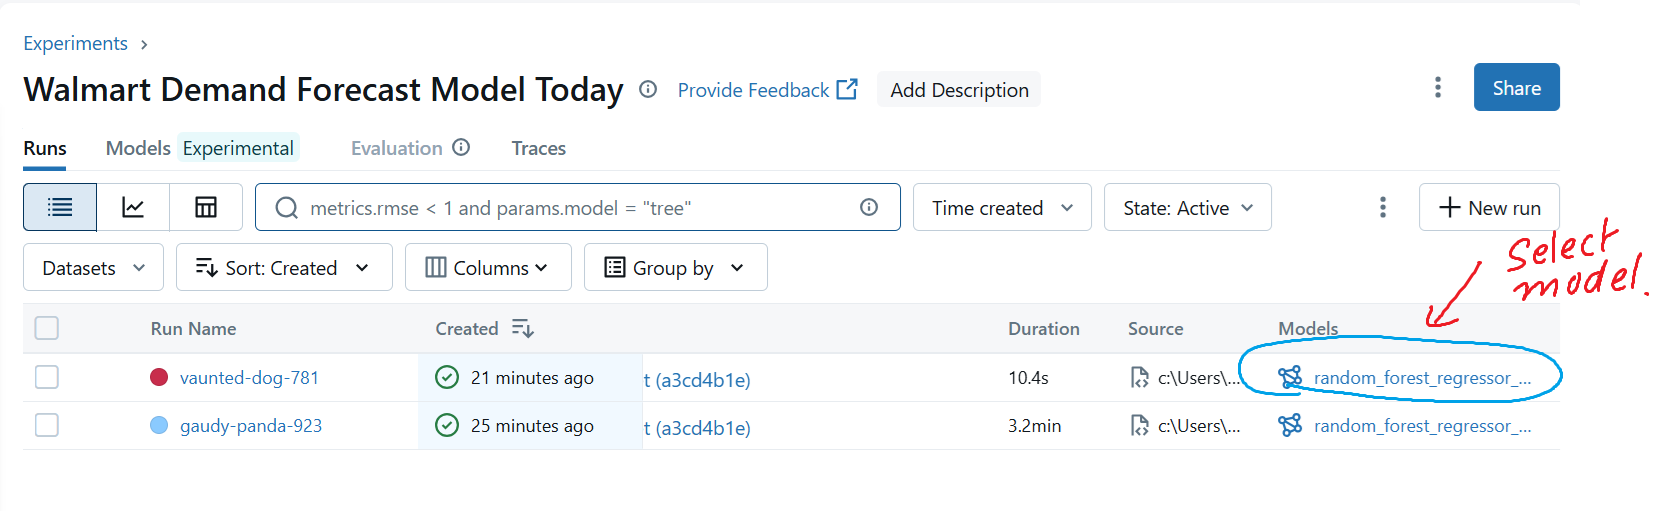

![Register Model](../../images/Lab1/register.png)

![Select Experiments](../../images/Lab1/register1.png)

#### <span style="color:orange">Step 11: Check your registered Model</span>


![Select Experiments](../../images/Lab1/registered_model.png)

#### <span style="color:orange">Step 12: Access and validate your registered Model</span>

You have been provided with some dummy data. Test this data and make prediction with your registered model
Complete the TODO section before running below code


In [ ]:
import pandas as pd
import numpy as np
import mlflow.pyfunc
from sklearn.preprocessing import StandardScaler

# Define the dummy data structure based on your trained model's features
dummy_data = pd.DataFrame({
    "age": [25, 40, 18],                   # Passenger age
    "fare": [7.25, 71.28, 8.05],          # Passenger fare
    "class_First": [1, 0, 0],             # 1st class indicator (dummy variable)
    "class_Second": [0, 1, 0],            # 2nd class indicator (dummy variable)
    "sex_male": [0, 1, 0],                # Gender (1 = male, 0 = female)
    "embarked_Q": [0, 0, 1],              # Embarked from Queenstown (dummy variable)
    "embarked_S": [1, 0, 0],              # Embarked from Southampton (dummy variable)
    "who_man": [0, 1, 0],                 # Gender-based classification (man)
    "who_woman": [1, 0, 1],               # Gender-based classification (woman)
    "alone_True": [0, 1, 0]               # Traveling alone indicator
})

# Load the model from MLflow
#TODO: model_name = "Enter your model name"
#TODO: model_version = "Enter your model version"  # for version 1, just use 1

model_uri = f'models:/{model_name}/{model_version}'
loaded_model = mlflow.pyfunc.load_model(model_uri)

# Standardize dummy data using the same scaler as the trained model
scaler = StandardScaler()

# Scale the dummy data (fit_transform should have been done on training data earlier)
dummy_data_scaled = scaler.fit_transform(dummy_data)  # Use `transform` if reusing a saved scaler

# Predict using the loaded model
predictions = loaded_model.predict(dummy_data_scaled)

# Display predictions
print("Dummy Data Predictions:")
print(predictions)


## <span style="color:yellow">END OF LAB</span>